Tumor Classification

In this challenge, you’ll apply your machine learning skills to build a model that predicts whether a breast tumor is benign or malignant. The dataset includes features like cell size, texture, and shape, and your goal is to create a predictive model that accurately classifies the tumors based on these characteristics. It’s a great opportunity to test how well your model performs in a real-world scenario. Let’s see how accurate you can get!
svm

In [3]:
import sklearn
import numpy as np
import pandas as pd 
import matplotlib as plt 
from sklearn.linear_model import LogisticRegression
# svm
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,cross_val_predict


## Data preparation
### Loading data

In [4]:
test_data = pd.read_csv("challenge 1/data/test.csv")
train_data = pd.read_csv("challenge 1/data/train.csv")


### analysis with train

In [5]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.69560,0.15460,0.4761,0.14020
1,2,B,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238
2,3,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762
3,4,B,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188
4,5,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [6]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,169.0,485.000000,48.930222,401.000000,443.000000,485.000000,527.000000,569.00000
radius_mean,169.0,14.005219,3.542801,6.981000,11.630000,13.270000,15.370000,27.42000
texture_mean,169.0,19.176805,4.400282,9.710000,15.830000,19.040000,22.110000,29.37000
perimeter_mean,169.0,91.094260,24.386080,43.790000,74.720000,85.840000,100.200000,186.90000
area_mean,169.0,646.479290,364.258556,143.500000,409.700000,546.300000,732.400000,2501.00000
smoothness_mean,169.0,0.096736,0.013625,0.062510,0.087520,0.095870,0.104400,0.13980
compactness_mean,169.0,0.101067,0.049217,0.019380,0.062210,0.087990,0.129200,0.27760
concavity_mean,169.0,0.083131,0.071584,0.000000,0.027720,0.059990,0.120400,0.36350
concave points_mean,169.0,0.047363,0.036686,0.000000,0.020680,0.035150,0.066060,0.18780
symmetry_mean,169.0,0.180750,0.025809,0.106000,0.161900,0.179800,0.195900,0.26780


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,200.500000,115.614301,1.000000,100.750000,200.500000,300.250000,400.00000
radius_mean,400.0,14.178867,3.519271,7.691000,11.710000,13.375000,16.180000,28.11000
texture_mean,400.0,19.337325,4.263096,10.910000,16.327500,18.830000,21.547500,39.28000
perimeter_mean,400.0,92.338625,24.283199,47.920000,75.267500,86.415000,107.100000,188.50000
area_mean,400.0,658.442250,346.971049,170.400000,420.875000,552.600000,810.600000,2499.00000
smoothness_mean,400.0,0.096201,0.014259,0.052630,0.085828,0.095890,0.105525,0.16340
compactness_mean,400.0,0.105724,0.054261,0.023440,0.065675,0.095275,0.130700,0.34540
concavity_mean,400.0,0.091194,0.082886,0.000000,0.029575,0.061680,0.133825,0.42680
concave points_mean,400.0,0.049577,0.039690,0.000000,0.020310,0.033300,0.077677,0.20120
symmetry_mean,400.0,0.181336,0.028094,0.116700,0.161975,0.179150,0.195450,0.30400


In [6]:
train_data.info

<bound method DataFrame.info of       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1         M       11.840         18.70           77.93      440.6   
1      2         B       12.760         18.84           81.87      496.6   
2      3         M       23.290         26.67          158.90     1685.0   
3      4         B       12.560         19.07           81.92      485.8   
4      5         B        9.742         15.67           61.50      289.9   
..   ...       ...          ...           ...             ...        ...   
395  396         M       14.220         23.12           94.37      609.9   
396  397         B       11.800         17.26           75.26      431.9   
397  398         B       12.800         17.46           83.05      508.3   
398  399         M       14.190         23.81           92.87      610.7   
399  400         B       12.990         14.23           84.08      514.3   

     smoothness_mean  compactness_mean  concavity_mean 

In [7]:
train_data.value_counts()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
384  B          12.470       17.31         80.45           480.1      0.08928          0.07630           0.03609         0.02369              0.1526         0.06046                 0.1532     0.7810      1.253         11.91    0.003796       0.01371         0.013460      0.007096           0.01536      0.001541              14.06         24.34          92.82            607.3       0.1276            0.2506             0.20280          0.10530               0.3035          0.07661                 

see if there is any missing values

In [32]:
train_data.isnull().value_counts()

id     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
False  False      False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False                 False           False               

### we have at the end two results so its could be express as binary 



In [9]:
# feature are all columns except our label diagnosis 
x_train = train_data.drop(columns=['id','diagnosis'],axis=1)
x_test = test_data.drop(columns=['id'])
# label
y_train = train_data['diagnosis']
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,...,11.660,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
1,10.650,25.22,68.01,347.0,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.1499,0.13980,0.11250,0.06136,0.3409,0.08147
2,13.470,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,0.06639,...,14.830,18.32,94.94,660.2,0.1393,0.24990,0.18480,0.13350,0.3227,0.09326
3,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,23.170,27.65,157.10,1748.0,0.1517,0.40020,0.42110,0.21340,0.3003,0.10480
4,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,13.340,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8.598,20.98,54.66,221.8,0.12430,0.08963,0.030000,0.009259,0.1828,0.06757,...,9.565,27.04,62.06,273.9,0.1639,0.16980,0.09001,0.02778,0.2972,0.07712
165,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.1641,0.22350,0.17540,0.08512,0.2983,0.10490
166,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259
167,10.050,17.53,64.41,310.8,0.10070,0.07326,0.025110,0.017750,0.1890,0.06331,...,11.160,26.84,71.98,384.0,0.1402,0.14020,0.10550,0.06499,0.2894,0.07664


In [10]:
y_train = y_train.replace({'B': 0, 'M': 1})

C:\Users\abdelhadi\AppData\Local\Temp\ipykernel_5884\1970381334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'B': 0, 'M': 1})


In [11]:
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)


In [12]:
print(x_train_scale.shape) 
print(y_train.shape)

(400, 30)
(400,)


### train and evaluate the KNN model with cross validation

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(x_train_scale, y_train)

y_pred = knn_model.predict(x_test_scale)
print("prediction:", y_pred)


prediction: [0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1]


In [14]:
cv_scores = cross_val_score(knn_model, x_train_scale, y_train, cv=6, scoring='accuracy')#6 fold cross validation


print("cross validation scores:", cv_scores)#cross-validation scores
print("mean accuracy:", cv_scores.mean())#accuracy


Cross-validation scores: [0.98507463 1.         0.95522388 0.94029851 0.96969697 0.98484848]
Mean accuracy: 0.9725237449118046


### accuracy for different values of k (neighbors)

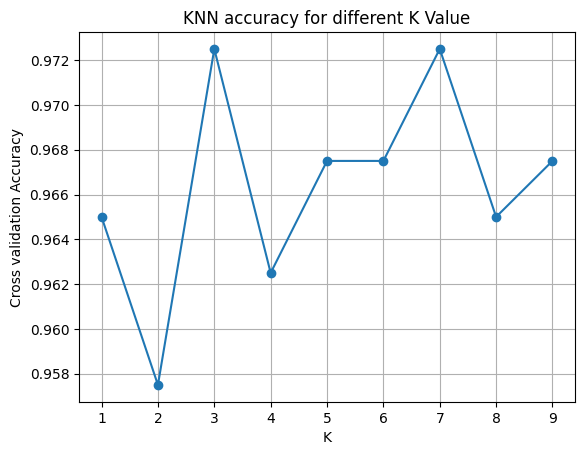

In [17]:
accuracies = []
k_values = range(1, 10)  #  k values 
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn_model, x_train_scale, y_train, cv=5, scoring='accuracy')
    accuracies.append(cv_score.mean())

# accuracy with k values
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN accuracy for different K Value')
plt.xlabel('K')
plt.ylabel('Cross validation Accuracy')
plt.grid(True)
plt.show()
cv_scores = cross_val_score(knn_model, x_train_scale, y_train, cv=5, scoring='accuracy')

In [132]:
log_model = LogisticRegression()
log_model.fit(x_train_scale, y_train)

# Predict and evaluate
y_pred = log_model.predict(x_test_scale)

In [138]:
mmodel = LogisticRegression()
mmodel.fit(x_train_scale, y_train)
#  cross_val_predict to predict on training data
y_train_pred = cross_val_predict(log_model, x_train_scale, y_train, cv=5)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       252
           M       1.00      0.97      0.99       148

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [110]:
"""mymodel = LogisticRegression()
# train
mymodel.fit(x_train_scale, y_train)
# Evaluate on the validation set
val_pred = mymodel.predict(x_test_scale)"""

'mymodel = LogisticRegression()\n# train\nmymodel.fit(x_train_scale, y_train)\n# Evaluate on the validation set\nval_pred = mymodel.predict(x_test_scale)'

In [1]:
'''print(classification_report(y_train, y_pred))'''

'print(classification_report(y_train, y_pred))'